## Exercici 1

Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

 * Una variable categòrica (UniqueCarrier)
 * Una variable numèrica (ArrDelay)
 * Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
 * Dues variables numèriques (ArrDelay i DepDelay)
 * Tres variables (ArrDelay, DepDelay i UniqueCarrier)
 * Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).


In [74]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# Configuracion para que se mestren todas las columnas
pd.set_option('display.max_columns', None)
# Configuracion para que los valores no se muestren con punto flotante
pd.options.display.float_format = '{:,.2f}'.format
# Lectura del fichero
df = pd.read_csv('DelayedFlights.csv')

In [76]:
# Normalizacion de los nombres de la columnas
df.columns = [col.lower() for col in df]

In [77]:
df.rename(columns={
    'dayofmonth': 'day_of_month', 
    'dayofweek': 'day_of_week',
    'crsdeptime': 'crs_dep_time',
    'crsarrtime': 'crs_arr_time',
    'uniquecarrier': 'unique_carrier',
    'actualelapsedtime': 'actual_elapsed_time',
    'crselapsedtime': 'crs_elapsed_time',
    'airtime': 'air_time',
    'arrdelay': 'arr_delay',
    'depdelay': 'dep_delay',
    'taxiout': 'taxi_out',
    'taxiin': 'taxi_in',
    'cancellationcode': 'cancellation_code',
    'carrierdelay': 'carrier_delay',
    'weatherdelay': 'weather_delay',
    'nasdelay': 'nas_delay',
    'securitydelay': 'security_delay',
    'lateaircraftdelay': 'late_air_craft_delay',
    'deptime': 'dep_time',
    'arrtime': 'arr_time',
    'tailnum': 'tail_num',
    'flightnum': 'flight_num'
    }, inplace=True)
df.columns

Index(['unnamed: 0', 'year', 'month', 'day_of_month', 'day_of_week',
       'dep_time', 'crs_dep_time', 'arr_time', 'crs_arr_time',
       'unique_carrier', 'flight_num', 'tail_num', 'actual_elapsed_time',
       'crs_elapsed_time', 'air_time', 'arr_delay', 'dep_delay', 'origin',
       'dest', 'distance', 'taxi_in', 'taxi_out', 'cancelled',
       'cancellation_code', 'diverted', 'carrier_delay', 'weather_delay',
       'nas_delay', 'security_delay', 'late_air_craft_delay'],
      dtype='object')

In [78]:
df.head()

,unnamed: 0,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,unique_carrier,flight_num,tail_num,actual_elapsed_time,crs_elapsed_time,air_time,arr_delay,dep_delay,origin,dest,distance,taxi_in,taxi_out,cancelled,cancellation_code,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_air_craft_delay
0,0,2008,1,3,4,"2,003.00",1955,"2,211.00",2225,WN,335,N712SW,128.00,150.00,116.00,-14.00,8.00,IAD,TPA,810,4.00,8.00,0,N,0,nan,nan,nan,nan,nan
1,1,2008,1,3,4,754.00,735,"1,002.00",1000,WN,3231,N772SW,128.00,145.00,113.00,2.00,19.00,IAD,TPA,810,5.00,10.00,0,N,0,nan,nan,nan,nan,nan
2,2,2008,1,3,4,628.00,620,804.00,750,WN,448,N428WN,96.00,90.00,76.00,14.00,8.00,IND,BWI,515,3.00,17.00,0,N,0,nan,nan,nan,nan,nan
3,4,2008,1,3,4,"1,829.00",1755,"1,959.00",1925,WN,3920,N464WN,90.00,90.00,77.00,34.00,34.00,IND,BWI,515,3.00,10.00,0,N,0,2.00,0.00,0.00,0.00,32.00
4,5,2008,1,3,4,"1,940.00",1915,"2,121.00",2110,WN,378,N726SW,101.00,115.00,87.00,11.00,25.00,IND,JAX,688,4.00,10.00,0,N,0,nan,nan,nan,nan,nan


### Una variable categòrica (UniqueCarrier)

Text(0, 0.5, 'Cantidad de vuelos')

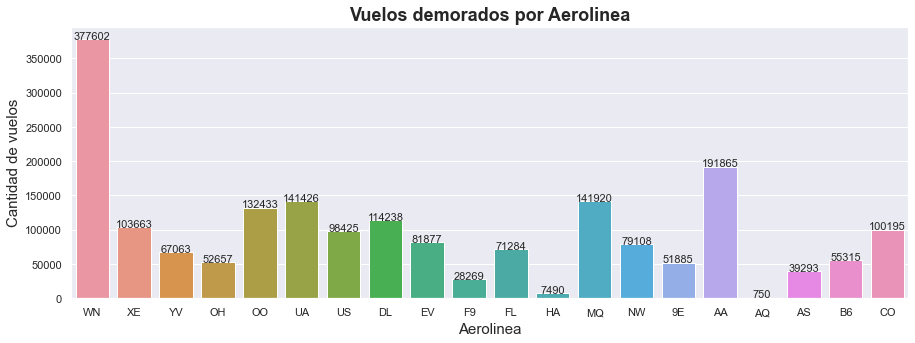

In [79]:
plt.rcParams['figure.figsize'] = (15, 5)

df_unique_carrier = df[df['dep_delay'] > 0]
sns.set_theme(style = "darkgrid")
categotical_chart = sns.countplot(x = "unique_carrier", data = df_unique_carrier)

# Agrega la cantidad de casos en cada barra
for rect in categotical_chart.patches:
    categotical_chart.text (rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.75, rect.get_height(), horizontalalignment = 'center', fontsize = 11)

# Rename de labels
categotical_chart.set_title('Vuelos demorados por Aerolinea', fontsize = 18, fontweight = 'bold' )
categotical_chart.set_xlabel('Aerolinea', fontsize = 15)
categotical_chart.set_ylabel('Cantidad de vuelos', fontsize = 15)

Aquí podemos ver que la aerolinea Southwest Airlines es la que tiene más cantidad de vuelos con retrasos.

### Una variable numèrica (ArrDelay)

Text(0.5, 0, 'Demora de Arribo')

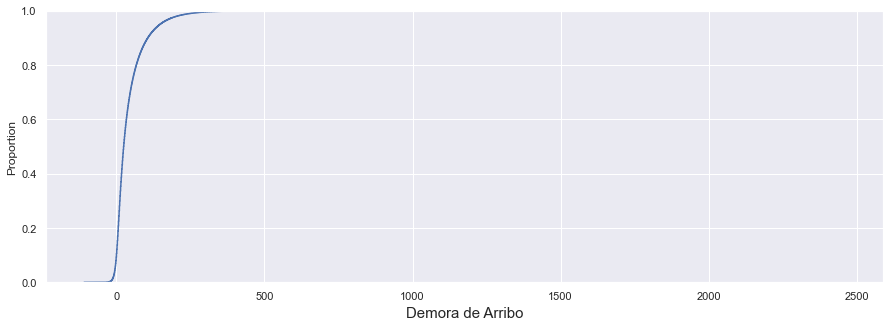

In [80]:
quantitative_delay_chart = sns.ecdfplot(data = df, x = "arr_delay")
quantitative_delay_chart.set_xlabel('Demora de Arribo', fontsize = 15)

Aqui podemos ver cómo se distribuye la demora de arribo, podemos observar que la probabilidad de que sea menos o igual a 0 es menos del 10 porciento

### Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)

Text(0, 0.5, 'Aerolinea')

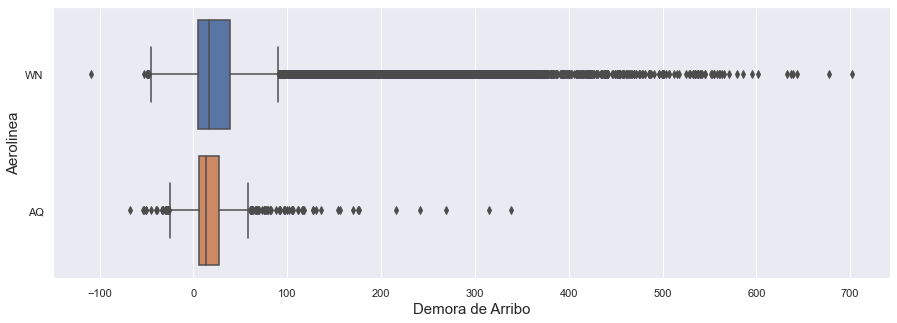

In [81]:
df_aq_wn = df[((df['unique_carrier'] == 'WN') | (df['unique_carrier'] == 'AQ'))]
quantitative_categorical_chart = sns.boxplot(data = df_aq_wn, x = "arr_delay", y = "unique_carrier")
quantitative_categorical_chart.set_xlabel('Demora de Arribo', fontsize = 15)
quantitative_categorical_chart.set_ylabel('Aerolinea', fontsize = 15)

Aqui podemos comparar la distrubción de la demora de arribo entre la aerolinea con mayor demoras con la de menor demoras.
Podemos ver que Aloha Airlines tiene una mediana menor y tiempos de demora más concentrados, a dferencia de Southwest Airlines, donde las demoras están más dispersas.

### Dues variables numèriques (ArrDelay i DepDelay)

Text(0, 0.5, 'Demora de Despegue')

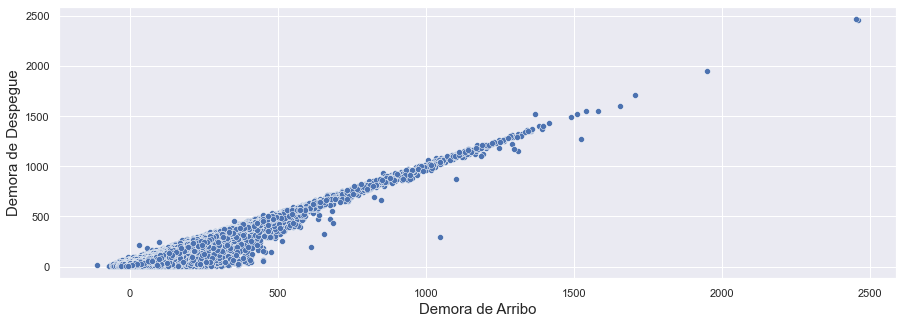

In [82]:
two_quantitative_chart = sns.scatterplot(data = df, x = "arr_delay", y = "dep_delay")
two_quantitative_chart.set_xlabel('Demora de Arribo', fontsize = 15)
two_quantitative_chart.set_ylabel('Demora de Despegue', fontsize = 15)

El gráfico de Scatter nos ayuda a determinar si hay relación entre dos variables. Aqui podemos observar que hay una relación entre arr_delay y dep_delay, y que también parece ser una relación lineal.

In [83]:
df.corr()

,unnamed: 0,year,month,day_of_month,day_of_week,dep_time,crs_dep_time,arr_time,crs_arr_time,flight_num,actual_elapsed_time,crs_elapsed_time,air_time,arr_delay,dep_delay,distance,taxi_in,taxi_out,cancelled,diverted,carrier_delay,weather_delay,nas_delay,security_delay,late_air_craft_delay
unnamed: 0,1.00,nan,1.00,0.06,-0.00,-0.01,-0.01,-0.00,0.00,-0.02,0.03,0.03,0.02,0.00,0.01,0.03,0.03,0.02,0.03,0.01,0.00,0.01,0.02,-0.00,0.00
year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
month,1.00,nan,1.00,0.06,0.00,-0.01,-0.01,0.00,0.00,-0.00,0.00,0.01,0.00,-0.00,0.00,0.01,0.02,0.00,0.03,0.01,0.00,0.01,0.01,-0.00,0.00
day_of_month,0.06,nan,0.06,1.00,0.02,0.00,0.00,0.00,0.00,-0.01,-0.00,-0.00,-0.00,0.00,0.01,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.01,-0.00,0.01
day_of_week,-0.00,nan,0.00,0.02,1.00,0.02,0.03,0.01,0.02,-0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.01,-0.01,0.00,-0.00,0.01,0.01,-0.01,0.00,0.01
dep_time,-0.01,nan,-0.01,0.00,0.02,1.00,0.88,0.46,0.71,-0.02,-0.05,-0.04,-0.05,0.13,0.14,-0.06,-0.01,0.03,0.00,-0.00,-0.05,0.01,0.02,-0.02,0.17
crs_dep_time,-0.01,nan,-0.01,0.00,0.03,0.88,1.00,0.40,0.71,-0.05,-0.03,-0.03,-0.04,0.04,0.06,-0.03,-0.03,0.01,0.00,-0.01,-0.11,-0.01,-0.03,-0.02,0.17
arr_time,-0.00,nan,0.00,0.00,0.01,0.46,0.40,1.00,0.62,-0.01,-0.01,-0.01,-0.02,-0.05,-0.05,-0.03,0.04,0.00,nan,-0.01,-0.08,-0.03,0.03,-0.01,-0.04
crs_arr_time,0.00,nan,0.00,0.00,0.02,0.71,0.71,0.62,1.00,-0.06,0.03,0.04,0.03,0.04,0.05,0.02,0.01,0.04,0.00,0.00,-0.10,-0.01,0.01,-0.01,0.13
flight_num,-0.02,nan,-0.00,-0.01,-0.01,-0.02,-0.05,-0.01,-0.06,1.00,-0.32,-0.34,-0.34,0.06,0.05,-0.36,-0.00,0.02,0.01,-0.00,0.06,0.07,0.02,-0.00,-0.05


Aqui podemos confirmar que existe dicha relación entre ambas variables, ya que para estas tenemos un coeficiente de 0.95, indicando una relación positiva.

### Tres variables (ArrDelay, DepDelay i UniqueCarrier)

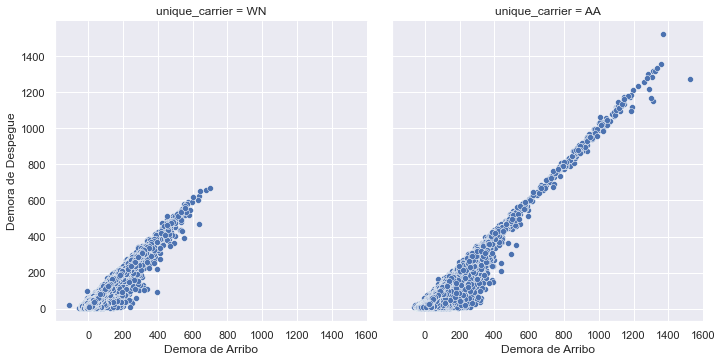

In [84]:
df_wn_aa = df[((df['unique_carrier'] == 'WN') | (df['unique_carrier'] == 'AA'))]
three_quantitative_chart = sns.relplot(data = df_wn_aa, x = "arr_delay", y = "dep_delay", col = "unique_carrier")
three_quantitative_chart.set_axis_labels('Demora de Arribo', 'Demora de Despegue')

Aqui podemos ver más marcada la relación lineal entre las dos variables, y también que American Airline tiene más tiempos de retrasos

### Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier)

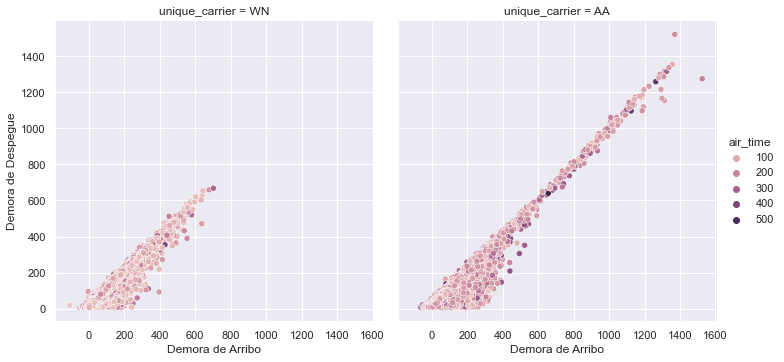

In [85]:
df_wn_aa = df[((df['unique_carrier'] == 'WN') | (df['unique_carrier'] == 'AA'))]
four_variables_chart = sns.relplot(data = df_wn_aa, x = "arr_delay", y = "dep_delay", col = "unique_carrier", hue = "air_time")
four_variables_chart.set_axis_labels('Demora de Arribo', 'Demora de Despegue')

Aqui podemos observar que gran parte de las más extensas demoras soon de vuelos largos

## Exercici 2

Exporta els gràfics com imatges o com html.

In [86]:
categotical_chart.figure.savefig('categotical_chart.png')
quantitative_delay_chart.figure.savefig('numeric_delay_chart.png')
numeric_categorical_chart.figure.savefig('numeric_categorical_chart.png')
two_quantitative_chart.figure.savefig('two_quantitative_chart.png')
three_quantitative_chart.savefig('three_quantitative_chart.png')
four_variables_chart.savefig('four_variables_chart.png')

## Exercici 3

Integra les visualitzacions gràfiques, en la tasca 2, del Mòdul 1.

En el Ejercicio del módulo 1 se agregaron dos variables, arr_late para indicar si el avión arribó o no, y plane_speed para indicar la velocidad del vuelo

In [87]:
# Se agrega columna que indica si el vuelo llegó tarde o no
def arrived_late(row):
    if row['arr_delay'] > 0:
        return 'yes'
    return 'no'

df['arr_late'] = df.apply(arrived_late, axis = 1)

# Se agrega columna que indica la valocidad media del vuelo
def calculate_velocity(row):
    if row['air_time'] > 0:
        return row['distance'] / row['air_time']
    return 0

df['plane_speed'] = df.apply(calculate_velocity, axis = 1)

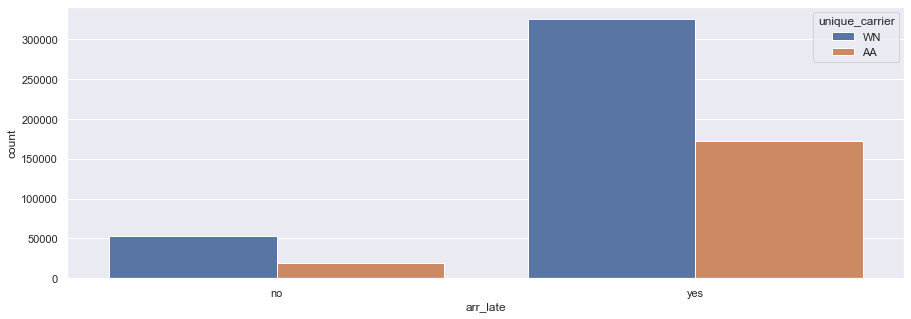

In [88]:
df_wn_aa = df[((df['unique_carrier'] == 'WN') | (df['unique_carrier'] == 'AA'))]
ax = sns.countplot(x = "arr_late", data = df_wn_aa, hue="unique_carrier")

Podemos ver que hay una gran cantidad de vuelos que no llegaron de Southwest Airlines en comparación de American.

Text(0, 0.5, 'Aerolinea')

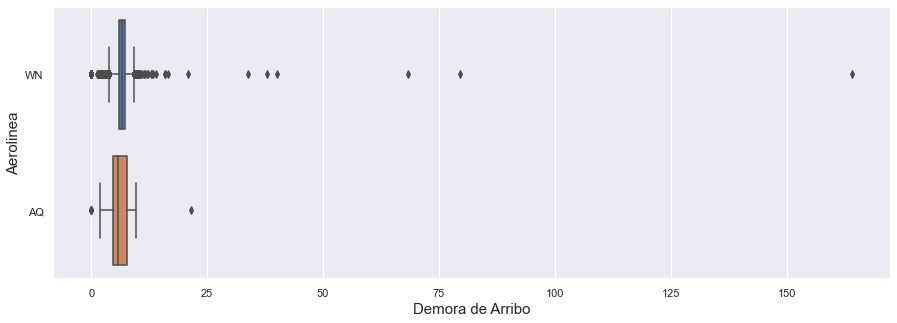

In [90]:
df_aq_wn = df[((df['unique_carrier'] == 'WN') | (df['unique_carrier'] == 'AQ'))]
quantitative_categorical_chart = sns.boxplot(data = df_aq_wn, x = "plane_speed", y = "unique_carrier")
quantitative_categorical_chart.set_xlabel('Demora de Arribo', fontsize = 15)
quantitative_categorical_chart.set_ylabel('Aerolinea', fontsize = 15)

Aqui podemos ver que la distribución de la velocidad de Southwest Airlines está bien concentrada, aproximandose a una distribución Normal. En cambio Aloha Airlines la velocidad está más distribuida.

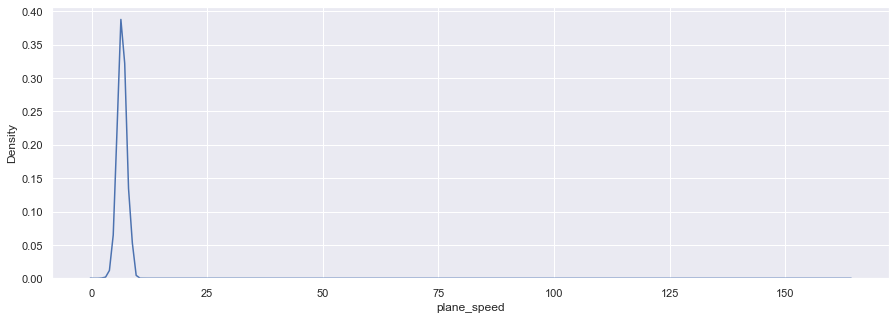

In [91]:
df_aq_wn = df[((df['unique_carrier'] == 'WN'))]
quantitative_categorical_chart = sns.kdeplot(data = df_aq_wn, x = "plane_speed")

Aquí podemos ver que la velocidad de Southwest Airlines tiene una aproximación Normal.